# COMP-551 Mini-Project 1 Linear Regression Page

# 1. Acquire, preprocess, and analyze the data




### 1.1 Acquire Data 


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import copy
import warnings
import math
from pandas import DataFrame

warnings.filterwarnings('ignore')


# ENB Dataset
url1 = "https://archive.ics.uci.edu/ml/machine-learning-databases/00242/ENB2012_data.xlsx"
enb = pd.read_excel(url1, header=None, skiprows=1)

# ENB
enb.columns = ['Relative Compactness',
               'Surface Area',
               'Wall Area',
               'Roof Area',
               'Overall Height',
               'Orientation',
               'Glazing Area',
               'Glazing Area Distribution',
               'Heating Load',
               'Cooling Load']


## 1.2 Preprocess Data
### 1.2.1 ENB Dataset
We first remove all the columns with missing values.

In [ ]:
enb.dropna()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
...,...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,17.88,21.40
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,16.54,16.88
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16.48,16.61


### Correlation between features and outputs
We wanted to observe how certain features of the ENB dataset affect the final results. Using corr() we are able to determine which features seem to have a stronger correlation.

In [ ]:
enb.corr()['Heating Load']

Relative Compactness         0.622272
Surface Area                -0.658120
Wall Area                    0.455671
Roof Area                   -0.861828
Overall Height               0.889430
Orientation                 -0.002587
Glazing Area                 0.269842
Glazing Area Distribution    0.087368
Heating Load                 1.000000
Cooling Load                 0.975862
Name: Heating Load, dtype: float64

In [ ]:
enb.corr()['Cooling Load']

Relative Compactness         0.634339
Surface Area                -0.672999
Wall Area                    0.427117
Roof Area                   -0.862547
Overall Height               0.895785
Orientation                  0.014290
Glazing Area                 0.207505
Glazing Area Distribution    0.050525
Heating Load                 0.975862
Cooling Load                 1.000000
Name: Cooling Load, dtype: float64

### We then decided to drop the attributes with a correlation between -0.5 and 0.5. In order to remove irrelevant data from the dataset.

In [ ]:
# Statistically Significant features
features = ['Relative Compactness',
            'Surface Area',
            'Roof Area',
            'Overall Height']

targets = ['Heating Load',
           'Cooling Load']



## 1.3 Analyze Data
### 1.3.1 What are the distributions of the positive vs. negative classes?

In [ ]:
# mean, median, and std
def basicStat(df_features):
  series_dict = {
    "Mean" : df_features.astype(int).mean(),
    "Median" : df_features.astype(int).median(),
    "Std" : df_features.astype(int).std(),
  }

  res = pd.concat(series_dict, axis=1)
  return pd.DataFrame(res)
  
enbStat = enb
display(basicStat(enbStat)[-2:])

,Mean,Median,Std
Heating Load,21.828125,18.5,10.071149
Cooling Load,24.091146,22.0,9.514390


In this dataset, we observed the above values for the Heating and Cooling Load classes.

### 1.3.2 What are the distributions of some of the numerical features?


Cooling Load               Cooling Load                 1.000000
Heating Load               Heating Load                 1.000000
Surface Area               Surface Area                 1.000000
Wall Area                  Wall Area                    1.000000
Roof Area                  Roof Area                    1.000000
Overall Height             Overall Height               1.000000
Orientation                Orientation                  1.000000
Glazing Area               Glazing Area                 1.000000
Glazing Area Distribution  Glazing Area Distribution    1.000000
Relative Compactness       Relative Compactness         1.000000
                           Surface Area                 0.991901
Surface Area               Relative Compactness         0.991901
Heating Load               Cooling Load                 0.975862
Cooling Load               Heating Load                 0.975862
Roof Area                  Overall Height               0.972512
Overall Height           

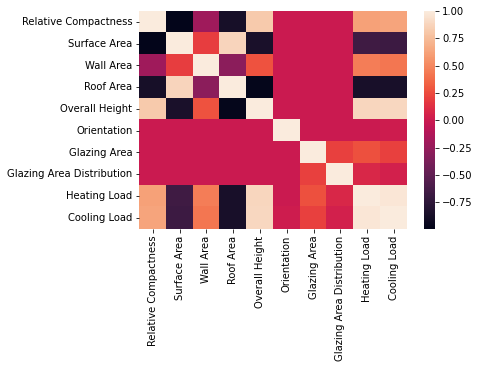

In [ ]:
enbMatrix = enb.corr()

c = enbMatrix.abs()
s = c.unstack()
so = s.sort_values(kind="quicksort")
print(so[::-1].head(20))

sb.heatmap(enbMatrix)

In [ ]:
enbStat = enb
display(basicStat(enbStat)[:-2])

,Mean,Median,Std
Relative Compactness,0.000000,0.0,0.000000
Surface Area,671.416667,673.5,88.120300
Wall Area,318.250000,318.0,43.533380
Roof Area,176.250000,183.5,45.053640
Overall Height,5.000000,5.0,2.001303
Orientation,3.500000,3.5,1.118763
Glazing Area,0.000000,0.0,0.000000
Glazing Area Distribution,2.812500,3.0,1.550960


In [ ]:
# normalize both datasets

def normalize(x):
  normalized = (x-min(x))/(max(x)-min(x))
  return normalized

enb = enb.apply(normalize)

display(enb.head())

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
0,1.000000,0.000000,0.285714,0.000000,1.0,0.000000,0.0,0.0,0.257212,0.280905
1,1.000000,0.000000,0.285714,0.000000,1.0,0.333333,0.0,0.0,0.257212,0.280905
2,1.000000,0.000000,0.285714,0.000000,1.0,0.666667,0.0,0.0,0.257212,0.280905
3,1.000000,0.000000,0.285714,0.000000,1.0,1.000000,0.0,0.0,0.257212,0.280905
4,0.777778,0.166667,0.428571,0.111111,1.0,0.000000,0.0,0.0,0.399838,0.468085


# 2. Implement the Models

## 2.1 Implement analytical linear regression solution for Dataset 1

In [ ]:

class LinearRegressionAnalytical:
    def __init__(self, add_bias=True):  # bias -> y = mx + b where b is the bias
        self.add_bias = add_bias
        pass

    def fit(self, x, y):
        if x.ndim == 1:
            x = x[:, None]  # add a dimension for the features
        N = x.shape[0]
        if self.add_bias:
            x = np.column_stack([x, np.ones(N)])  # add bias by adding a constant feature of value 1

        self.w = np.linalg.inv(x.T @ x) @ x.T @ y  # analytical formulation
        return self

    def predict(self, x):
        if self.add_bias:
            x = np.column_stack([x, np.ones(x.shape[0])])
        yh = x @ self.w  # predict the y values,
        return yh


## 2.2 Implement mini-batch stochastic gradient descent for linear regression

In [ ]:


class LinearRegressionOptimized:
    def __init__(self, add_bias=True):
        self.add_bias = add_bias
        pass

    def fit(self, x, y, optimizer):
        if x.ndim == 1:
            x = x[:, None]
        if self.add_bias:
            N = x.shape[0]
            x = np.column_stack([x, np.ones(N)])
        N, D = x.shape

        def gradient(x, y, w):  # define the gradient function
            yh = x @ w
            N, D = x.shape
            grad = np.dot(yh - y, x) / N
            return grad

        w0 = np.zeros(D)  # initialize the weights to 0
        self.w = optimizer.run(gradient, x, y, w0)  # run the optimizer to get the optimal weights
        return self

    def predict(self, x):
        if self.add_bias:
            x = np.column_stack([x, np.ones(x.shape[0])])
        yh = x @ self.w
        return yh


class GradientDescent:

    def __init__(self, learning_rate=.001, max_iters=1e4, epsilon=1e-8, record_history=False, batch_size=8):
        self.learning_rate = learning_rate
        self.max_iters = max_iters
        self.record_history = record_history
        self.epsilon = epsilon
        self.batch_size = batch_size
        if record_history:
            self.w_history = []  # to store the weight history for visualization
            self.cost_history = []  # to store the cost history for visualization

    def run(self, gradient_fn, x, y, w):
        grad = np.inf
        t = 1
        epoch = 0

        numSamples = x.shape[0]

        # Seperates indices into mini-batches
        numBatches =  numSamples // self.batch_size if numSamples > self.batch_size else  1
        mini_batches_indices = np.array_split(np.arange(numSamples), numBatches)

        while np.linalg.norm(grad) > self.epsilon and t < self.max_iters:
            y = np.array(y)

            self.w_history.append(w)

            for batch in mini_batches_indices:
                mini_x, mini_y = (x[batch, :], y[batch])

                grad = gradient_fn(mini_x, mini_y, w)  # compute the gradient with present weight
                w = w - (self.learning_rate) * grad  # weight update step
                t += 1

            if self.record_history:
                self.w_history.append(w)
            epoch += 1
        return w



# 3. Run Experiments

### Split each dataset into training, and test sets. Use test set to estimate performance in all of the experiments after training the model with training set. Evaluate the performance using the corresponding cost function for the classification

## 3.1 Report the performance of linear regression and fully batched logistic regression. For both datasets use a 80/20 train/test split and report the performance on both training set and test set.


### 3.1.1 Train/Test Split method

In [ ]:
def split_data(df: DataFrame, ratio=0.8):
    """
    This function is used to split the dataset into train and test sets
    :param df: Dataframe of dataset
    :param ratio: percent of dataset used for training
    :returns: training and testing dataset split based on given ratio
    """
    np.random.seed(2)
    msk = np.random.rand(len(df)) < ratio
    train = df[msk]
    test = df[~msk]
    return train, test

def get_mean_abs_error(train, pred):

  return np.mean(np.abs(train - pred))


def mean_squared_error(y_true, y_pred):
    """
    This function calculates MSE
    :param y_true: list of real numbers, true values
    :param y_pred: list of real numbers, predicted values
    :returns: mean squared error
    """
    return np.mean(np.abs(np.array(y_pred) - np.array(y_true)) ** 2, axis=0)


### 3.1.1 Performance of Energy Dataset

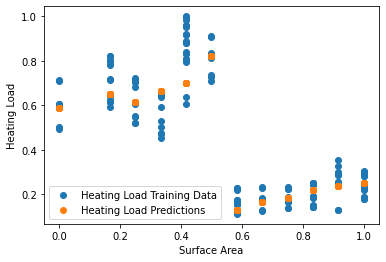

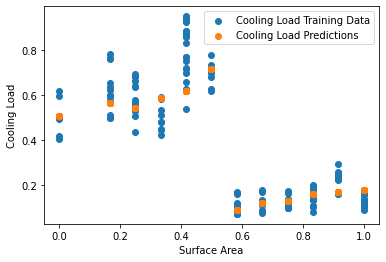

Mean Absolute Error of Heating Load 0.26870103108627763
Mean Absolute Error of Cooling Load 0.27076763208828775
Mean Squarred Error of Heating Load 0.009267149626655962
Mean Squarred Error of Cooling Load 0.009958122364796552


In [ ]:
train, test = split_data(enb, 0.8)
x = train[features]
y = train[targets]
testX = test[features]

LR = LinearRegressionAnalytical()
predictedTargets = LR.fit(x, y).predict(testX)

predictedHeatingLoad = predictedTargets['Heating Load']
predictedCoolingLoad = predictedTargets['Cooling Load']

errorHeating = get_mean_abs_error(test['Heating Load'], predictedHeatingLoad)
errorCooling = get_mean_abs_error(test['Cooling Load'], predictedCoolingLoad)

errorHeatingSqr = mean_squared_error(test['Heating Load'], predictedHeatingLoad)
errorCoolingSqr = mean_squared_error(test['Cooling Load'], predictedCoolingLoad)

plt.scatter(test['Surface Area'], test['Heating Load'], label="Heating Load Training Data")
plt.scatter(test['Surface Area'], predictedHeatingLoad, label="Heating Load Predictions")
plt.xlabel('Surface Area')
plt.ylabel('Heating Load')
plt.legend()
plt.show()

plt.scatter(test['Surface Area'], test['Cooling Load'], label="Cooling Load Training Data")
plt.scatter(test['Surface Area'], predictedCoolingLoad, label="Cooling Load Predictions")
plt.xlabel('Surface Area')
plt.ylabel('Cooling Load')
plt.legend()
plt.show()

print("Mean Absolute Error of Heating Load " + str(errorHeating))
print("Mean Absolute Error of Cooling Load " + str(errorCooling))
print("Mean Squarred Error of Heating Load " + str(errorHeatingSqr))
print("Mean Squarred Error of Cooling Load " + str(errorCoolingSqr))

As observed above, we wanted to demonstrate the performance of our model by charting the testing heating and cooling loads based on the surface area, which we believed to be a useful feature in the dataset for performance measuring.

## 3.2 Report the weights of each of features in your trained models and discuss how each feature could affect the performance of the models.


In [ ]:
print(LR.w)

   Heating Load  Cooling Load
0     -0.616314     -0.659813
1     -0.196685     -0.311904
2     -0.390544     -0.317915
3      0.364252      0.356204
4      0.839689      0.808179


As mentioned above, we decided to remove the features with a correlation rate between -0.5 and 0.5. If features with low correlation to the target class are kept in a linear regression model, they can have a negative impact on the model's performance. They are unlikely to provide useful information for making accurate predictions, and can even introduce noise and confusion into our model.
If we kept these features, the model would become more complex and harder to interpret, and this can also lead to overfitting, where the model is too closely fit to the training data and performs poorly on unseen data. 

The features that remained are: Relative Compactness, Surface Area, Roof Area, Overall Height. Relative Compactness is the compactness of a building's design and insulation, which can affect its energy efficiency negatively if a building is not compact enough. Surface Area and Roof Area can provide information on the total exposed surface area of a building, which can also negatively affect the target classes if too high. Overall Height can provide information on the volume of a building, if the height is too grand, then the heating would be negatively affected also.


## 3.3 Sample growing subsets of the training data (20%,30%,...80%). Observe and explain how does size of training data affects the performance for both models. Plot two curves as a function of training size, one for performance in train and one for test

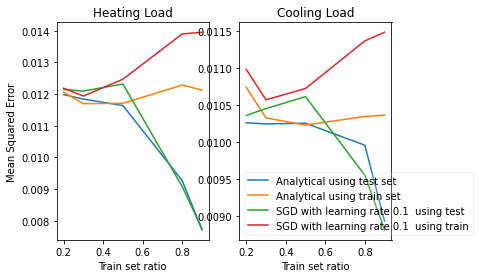

In [ ]:

def plotPerformance(model, trainSetRatio=[0.2, 0.3, 0.5, 0.8, 0.9], performanceTest='test'):
    performanceHL = []
    performanceCL = []
    for ratio in trainSetRatio:
        train, test = split_data(enb, ratio)
        x = train[features]
        y = train[targets]
        testX = test[features]

        LR = model


        if performanceTest == 'test':
          predictedTargets = LR.fit(x, y).predict(testX)

          predictedHeatingLoad = predictedTargets['Heating Load']
          predictedCoolingLoad = predictedTargets['Cooling Load']

          meanSquareErrHL = mean_squared_error(test['Heating Load'], predictedHeatingLoad)
          meanSquareErrCL = mean_squared_error(test['Cooling Load'], predictedCoolingLoad)
        
        else:
          predictedTargets = LR.fit(x, y).predict(x)

          predictedHeatingLoad = predictedTargets['Heating Load']
          predictedCoolingLoad = predictedTargets['Cooling Load']

          meanSquareErrHL = mean_squared_error(train['Heating Load'], predictedHeatingLoad)
          meanSquareErrCL = mean_squared_error(train['Cooling Load'], predictedCoolingLoad)



        performanceHL.append(meanSquareErrHL)
        performanceCL.append(meanSquareErrCL)

    plt.subplot(1, 2, 1)
    plt.plot(np.array(trainSetRatio), np.array(performanceHL))

    plt.subplot(1, 2, 2)
    plt.plot(np.array(trainSetRatio), np.array(performanceCL), label='Analytical using ' + performanceTest + ' set')


def plotPerformanceSGD(model, trainSetRatio=[0.2, 0.3, 0.5, 0.8, 0.9], batchSize=8, learningRate=0.1, lr=True, performanceTest='test'):
    performanceHL = []
    performanceCL = []
    for ratio in trainSetRatio:
        train, test = split_data(enb, ratio)
        x = train[features]
        y = train[targets]
        testX = test[features]

        optimizer = GradientDescent(learningRate, max_iters=10000, record_history=True, batch_size=batchSize)
        LR = model

        if performanceTest == 'test':

          predictedHeatingLoad = LR.fit(x, y['Heating Load'], optimizer).predict(testX)
          predictedCoolingLoad = LR.fit(x, y['Cooling Load'], optimizer).predict(testX)

          meanSquareErrHL = mean_squared_error(test['Heating Load'], predictedHeatingLoad)
          meanSquareErrCL = mean_squared_error(test['Cooling Load'], predictedCoolingLoad)
        
        else:

          predictedHeatingLoad = LR.fit(x, y['Heating Load'], optimizer).predict(x)
          predictedCoolingLoad = LR.fit(x, y['Cooling Load'], optimizer).predict(x)

          meanSquareErrHL = mean_squared_error(train['Heating Load'], predictedHeatingLoad)
          meanSquareErrCL = mean_squared_error(train['Cooling Load'], predictedCoolingLoad)

        performanceHL.append(meanSquareErrHL)
        performanceCL.append(meanSquareErrCL)

    plt.subplot(1, 2, 1)

    if lr:
      plt.plot(np.array(trainSetRatio), np.array(performanceHL), label=('SGD learning rate ' + str(learningRate) + ' using ' + performanceTest))
    else:
      plt.plot(np.array(trainSetRatio), np.array(performanceHL), label=('SGD mini-batch size ' + str(batchSize)))
    plt.xlabel('Train set ratio')
    plt.ylabel('Mean Squared Error')
    plt.title('Heating Load')

    plt.subplot(1, 2, 2)
    plt.xlabel('Train set ratio')
    if lr:
      plt.plot(np.array(trainSetRatio), np.array(performanceCL), label=('SGD with learning rate ' + str(learningRate) + '  using ' + performanceTest))
    else:
      plt.plot(np.array(trainSetRatio), np.array(performanceCL), label=('SGD mini-batch size ' + str(batchSize)))

    plt.title('Cooling Load')


plotPerformance(LinearRegressionAnalytical())
plotPerformance(LinearRegressionAnalytical(), performanceTest='train')
plotPerformanceSGD(LinearRegressionOptimized(), batchSize=64)
plotPerformanceSGD(LinearRegressionOptimized(), batchSize=64, performanceTest='train')
plt.legend(framealpha=0.2)
plt.show()


Increasing the size of a training subset will allow the model to iterated over greater data and improve the model's performance by reducing the variance in the estimates of the regression coefficients. As observed above, as the training set increases, we see a decrease in the mean squarred error of the predicted targets.

More importantly, by observing SGD with learning rate 0.1 using train in the chart above, we see that using the same training data as a testing set causes a larger MSE.

## 3.4 For both linear regression, try out growing minibatch sizes, e.g., 8, 16, 32, 64, and 128. Compare the convergence speed and final performance of different batch sizes to the fully batched baseline. Which configuration works the best among the ones you tried?

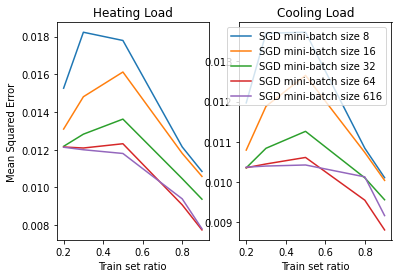

In [ ]:
batch = 4
for i in range(4):
  batch = batch * 2
  plotPerformanceSGD(LinearRegressionOptimized(), batchSize=batch, lr=False)

#fully batched
plotPerformanceSGD(LinearRegressionOptimized(), batchSize=x.shape[0], lr=False)

plt.legend()
plt.show()


Based on the plotted performances, we would say that a mini-batch size of 64 works the best. This is because it has a smaller mean squarred error.

## 3.5 Present the performance of both linear regression with at least three different learning rates (your own choice).

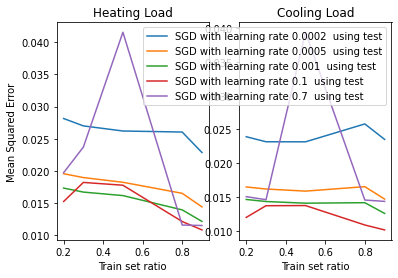

In [ ]:
lr = [0.0002, 0.0005, 0.001, 0.1, 0.7]
for i in range(len(lr)):
  plotPerformanceSGD(LinearRegressionOptimized(), learningRate=lr[i], lr=True)

plt.legend()
plt.show()


## 3.6 Compare analytical linear regression solution with mini-batch stochastic gradient descent based linear regression solution. What do you find?


We would argue that analytical linear regression and SGD both perform about the same. As observed in this image, the green line and the blue line are very close, thus showing a very similar performance.

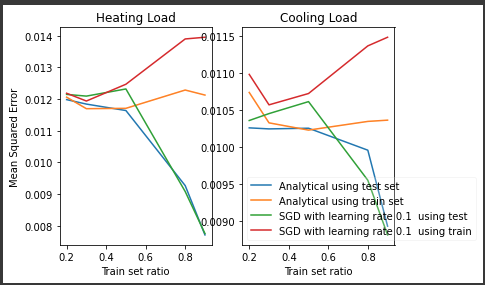

## 3.7 Ploting the cost per Epoch for the Linear Regression

In [ ]:
def plotCostperEpoch(model, trainSetRatio=0.8, batchSize=8, learningRate=0.1):
    train, test = split_data(enb, trainSetRatio)
    x = train[features]
    y = train[targets]
    testX = test[features]

    optimizer = GradientDescent(learningRate, max_iters=10000, record_history=True, batch_size=batchSize)
    LR = model

    predictedHeatingLoad = LR.fit(x, y['Heating Load'], optimizer).predict(testX)

    iterations = np.arange(len(optimizer.w_history))
    costs = np.array(cost_history(x, y['Heating Load'], optimizer.w_history))

    plt.plot(iterations, costs, label=('SGD mini-batch ' + str(batchSize), 'learning rate ' + str(learningRate)))
    plt.xlabel('Epoch')
    plt.ylabel('Cost')
    plt.title('Cost per Epoch SGD Heating Load')

def plotLossperEpoch(model, trainSetRatio=0.8, batchSize=8, learningRate=0.1):
    train, test = split_data(enb, trainSetRatio)
    x = train[features]
    y = train[targets]
    testX = test[features]

    optimizer = GradientDescent(learningRate, max_iters=10000, record_history=True, batch_size=batchSize)
    LR = model

    heatingLoadModel = LR.fit(x, y['Heating Load'], optimizer)

    losses = []


    for w in optimizer.w_history:

      heatingLoadModel.w = w
      yh = heatingLoadModel.predict(x)

      losses.append(mean_squared_error(y['Heating Load'], yh))

    epochs = np.arange(len(optimizer.w_history))

    plt.plot(epochs, losses, label=('SGD mini-batch ' + str(batchSize), 'learning rate ' + str(learningRate)))
    plt.xlabel('Epoch')
    plt.ylabel('MSE Loss')
    plt.title('Loss per Epoch SGD Heating Load')



    


In [ ]:
# Cost History Function

def cost_history(x, y, wArr):
    cost_history_arr = []
    x = np.array(x)
    y = np.array(y)
    x = np.column_stack([x, np.ones(x.shape[0])])  # add bias by adding a constant feature of value 1
    numSamples = x.shape[0]

    for w in wArr:
        w = w.reshape((1, w.shape[0]))
        costArr = []

        for i in range(numSamples):
            costArr.append(0.5 * (y[i] - np.dot(w, x[i])) ** 2)

        cost = np.sum(costArr) / numSamples
        cost_history_arr.append(cost)
    return cost_history_arr


### 3.7.1 Plotting cost per epoch based on different learning rates

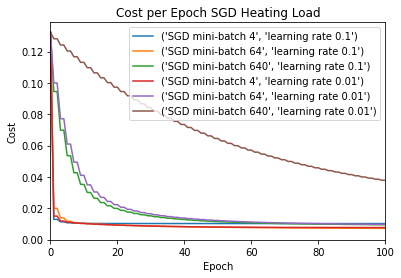

In [ ]:
batchSizes = [4,64, 640]
for lr in [0.1, 0.01]:
    for batchSize in batchSizes:
        plotCostperEpoch(LinearRegressionOptimized(), learningRate=lr, batchSize=batchSize)
plt.legend()
plt.xlim([0, 100])
plt.show()


## Loss per Epoch



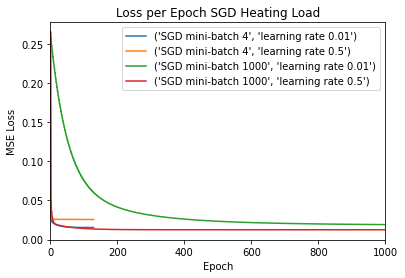

In [ ]:

for bSize in [4,1000]:
  for lr in [0.01,0.5]:
    plotLossperEpoch(LinearRegressionOptimized(), learningRate=lr, batchSize=bSize)

plt.legend()
plt.xlim([0, 1000])
plt.show()

Notice that smaller batches converge faster due to their stochastic movement but with high learning rates they don't find the optimal solution. It's a matter of using the optimal learning rate accroding to the batch size.

*SGD mini-batch 1000 is equivalent to a full batch